# **Chemical_Lab_Apparatus_Training_YOLOv12**

In [ ]:
!nvidia-smi

Mon Apr 28 15:19:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 51.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 134.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

***In this tutorial, we will use the (chemistry-lab-apparatus-detection) dataset.***

In [ ]:
from roboflow import download_dataset

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
version = project.version(8)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chemistry-Lab-Apparatus-DETN-8 in yolov12:: 100%|██████████| 9210/9210 [00:00<00:00, 9580.85it/s] 


In [ ]:
!ls {dataset.location}/data.yaml

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 25
names: ['Beaker', 'Buchner_Funnel', 'Burette_Stands', 'Calorimeter', 'Conical_Flask', 'Funnel', 'Glass_Rod', 'Measuring_Cylinder', 'Mechanical_Balance_Scale', 'Nessler_Reagent_Bottle', 'Pipette', 'Porcelain_Mortar Pestle', 'Precision_Weight_Scale', 'Reagent_Bottle', 'Round_Bottom_Flask_Borosilicate_Glass_1_Neck', 'Round_Bottom_Flask_Borosilicate_Glass_2_Neck', 'Round_Bottom_Flask_Borosilicate_Glass_3_Neck', 'Separating_Funnel', 'Spirit_Lamp', 'TestTube_Holder', 'Test_Tube', 'Volumetric_Flask', 'Volumetric_Pipet', 'Wash_Bottle', 'Weighing_Bottle']

roboflow:
  workspace: dip-project-cktfe
test: ../test/images
train: ../train/images
val: ../valid/images


***Train Custom Model***

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=50)

New https://pypi.org/project/ultralytics/8.3.119 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/Chemistry-Lab-Apparatus-DETN-8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.26M/5.26M [00:00<00:00, 65.2MB/s]


AMP: checks passed ✅


train: Scanning /content/Chemistry-Lab-Apparatus-DETN-8/train/labels... 3220 images, 4 backgrounds, 0 corrupt: 100%|██████████| 3220/3220 [00:01<00:00, 1629.45it/s]


train: New cache created: /content/Chemistry-Lab-Apparatus-DETN-8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 162, len(boxes) = 4863. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Chemistry-Lab-Apparatus-DETN-8/valid/labels... 920 images, 1 backgrounds, 0 corrupt: 100%|██████████| 920/920 [00:00<00:00, 1406.25it/s]

val: New cache created: /content/Chemistry-Lab-Apparatus-DETN-8/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 23, len(boxes) = 1393. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.82G      3.185      5.362        4.2          9        640: 100%|██████████| 202/202 [01:44<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.72it/s]

                   all        920       1393    0.00117     0.0222    0.00133    0.00025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.98G      2.988      5.189      3.901         10        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393    0.00201       0.18    0.00178   0.000422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.94G      2.607      4.914      3.283         11        640: 100%|██████████| 202/202 [01:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.53it/s]

                   all        920       1393      0.913     0.0243      0.017    0.00336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.96G      2.393      4.594      2.973         12        640: 100%|██████████| 202/202 [01:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:12<00:00,  2.34it/s]

                   all        920       1393      0.521     0.0761     0.0453     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.95G      2.238      4.275      2.793         14        640: 100%|██████████| 202/202 [01:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.55it/s]

                   all        920       1393      0.287      0.172      0.157      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.98G      2.143      4.024      2.681          9        640: 100%|██████████| 202/202 [01:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.53it/s]

                   all        920       1393       0.28      0.269      0.214     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.97G      2.085      3.804      2.607         13        640: 100%|██████████| 202/202 [01:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.54it/s]

                   all        920       1393       0.34      0.325      0.285      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.96G      2.025      3.638      2.534         11        640: 100%|██████████| 202/202 [01:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.51it/s]

                   all        920       1393       0.66      0.273      0.337       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.95G      1.974      3.427      2.463         14        640: 100%|██████████| 202/202 [01:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.50it/s]

                   all        920       1393       0.49      0.372      0.376      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.99G      1.913      3.283      2.403         13        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.54it/s]

                   all        920       1393      0.487      0.421      0.416      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.95G      1.858       3.09      2.348         10        640: 100%|██████████| 202/202 [01:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.53it/s]

                   all        920       1393      0.557       0.47      0.502      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.79G      1.823      2.976       2.32          7        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.53it/s]

                   all        920       1393      0.581       0.42      0.458      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.95G      1.788      2.862      2.263         13        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.53it/s]

                   all        920       1393      0.616      0.499      0.556      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.79G      1.749       2.74      2.224         10        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.55it/s]

                   all        920       1393      0.625      0.583      0.611      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.95G      1.721      2.656        2.2         13        640: 100%|██████████| 202/202 [01:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.55it/s]

                   all        920       1393      0.647      0.575      0.619      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.79G      1.687      2.548      2.155         13        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.55it/s]

                   all        920       1393      0.662      0.622      0.664      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.95G      1.661       2.47      2.137         13        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.56it/s]

                   all        920       1393      0.686      0.634      0.679       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.79G      1.629      2.391      2.103          8        640: 100%|██████████| 202/202 [01:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.56it/s]

                   all        920       1393      0.695      0.643      0.701      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.94G      1.619      2.336      2.085         16        640: 100%|██████████| 202/202 [01:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.55it/s]

                   all        920       1393      0.692      0.658      0.705       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.79G      1.607       2.28      2.059         12        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.51it/s]

                   all        920       1393        0.7      0.681      0.718      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.95G      1.581      2.176      2.033         10        640: 100%|██████████| 202/202 [01:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.51it/s]

                   all        920       1393      0.735      0.681      0.741      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.79G      1.576      2.153      2.025         12        640: 100%|██████████| 202/202 [01:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.54it/s]

                   all        920       1393      0.738      0.701      0.755      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.94G      1.559      2.092      2.003         17        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.54it/s]

                   all        920       1393      0.796      0.684      0.766      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.96G      1.525      2.058      1.984         13        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.54it/s]

                   all        920       1393      0.782      0.706      0.769      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.78G      1.529      2.023      1.981         12        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.57it/s]

                   all        920       1393      0.766      0.746      0.797       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.79G      1.523      1.997      1.962         12        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.781      0.727      0.795      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.78G      1.489      1.926      1.932         11        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.56it/s]

                   all        920       1393       0.78      0.775      0.809       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.79G      1.482      1.906      1.928         14        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.56it/s]

                   all        920       1393      0.766      0.774      0.804      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.78G      1.494       1.91      1.929         15        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.56it/s]

                   all        920       1393      0.811      0.776      0.817      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.79G      1.457       1.85        1.9         15        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.57it/s]

                   all        920       1393      0.803      0.772      0.827      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.78G      1.459       1.84       1.91         10        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.57it/s]

                   all        920       1393      0.818      0.787      0.832      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.79G      1.434      1.788      1.878         15        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.57it/s]

                   all        920       1393      0.814      0.778      0.837       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.78G      1.435      1.802      1.874         18        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.57it/s]

                   all        920       1393       0.81        0.8      0.835      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.95G       1.43      1.769      1.864         19        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.57it/s]

                   all        920       1393      0.822      0.817      0.843       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.78G      1.413      1.706      1.847          7        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.56it/s]

                   all        920       1393      0.855      0.794      0.845      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.96G      1.411      1.704      1.843         12        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.57it/s]

                   all        920       1393      0.858      0.801      0.851      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.78G      1.404      1.695      1.848          9        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.57it/s]

                   all        920       1393      0.861      0.806       0.86      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.82G      1.397      1.661      1.835         14        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.857      0.802      0.862       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.78G      1.393      1.663      1.827         10        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.868      0.824      0.874      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.79G      1.373      1.626      1.809         11        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.863       0.82       0.87      0.577


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.76G      1.229      1.149      1.749          6        640: 100%|██████████| 202/202 [01:43<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.866      0.835      0.885      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.95G      1.218      1.071      1.745          5        640: 100%|██████████| 202/202 [01:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.895      0.835      0.894      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.76G      1.199      1.034      1.721          8        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.881      0.857      0.904      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.95G      1.193       1.01      1.714          5        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.893      0.851      0.907      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.76G      1.171     0.9713      1.689          7        640: 100%|██████████| 202/202 [01:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.912      0.851      0.908      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.79G      1.162      0.959       1.68          5        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.898      0.865      0.909      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.76G      1.157     0.9399      1.673         10        640: 100%|██████████| 202/202 [01:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.895      0.874      0.913      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.95G      1.148     0.9374      1.664         11        640: 100%|██████████| 202/202 [01:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.897      0.873      0.918      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.76G      1.141     0.9113       1.66          5        640: 100%|██████████| 202/202 [01:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.58it/s]

                   all        920       1393      0.914      0.865      0.919      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.95G       1.13     0.9185       1.65          4        640: 100%|██████████| 202/202 [01:43<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.57it/s]

                   all        920       1393      0.913      0.868      0.919      0.635



50 epochs completed in 1.607 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,083,883 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.59it/s]


                   all        920       1393      0.914      0.868       0.92      0.635
                Beaker         78         79      0.924      0.848      0.922      0.628
        Buchner_Funnel         44         56      0.937      0.929      0.954      0.654
        Burette_Stands         57         57      0.969      0.965      0.993      0.696
           Calorimeter         66         66       0.88          1      0.882      0.686
         Conical_Flask         78         79      0.974      0.861      0.962      0.724
                Funnel         47         48      0.937      0.938      0.971      0.713
             Glass_Rod         57         90       0.78      0.856       0.88      0.504
    Measuring_Cylinder         43         49      0.908      0.939      0.946      0.616
Mechanical_Balance_Scale         47         47      0.946      0.957      0.928      0.707
Nessler_Reagent_Bottle         50         51      0.949      0.941      0.948      0.759
               Pipe

***Evaluate Model Performance***

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml					   train_batch1.jpg
confusion_matrix_normalized.png			   train_batch2.jpg
confusion_matrix.png				   train_batch8080.jpg
events.out.tfevents.1745854150.7d46081006e3.322.0  train_batch8081.jpg
F1_curve.png					   train_batch8082.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


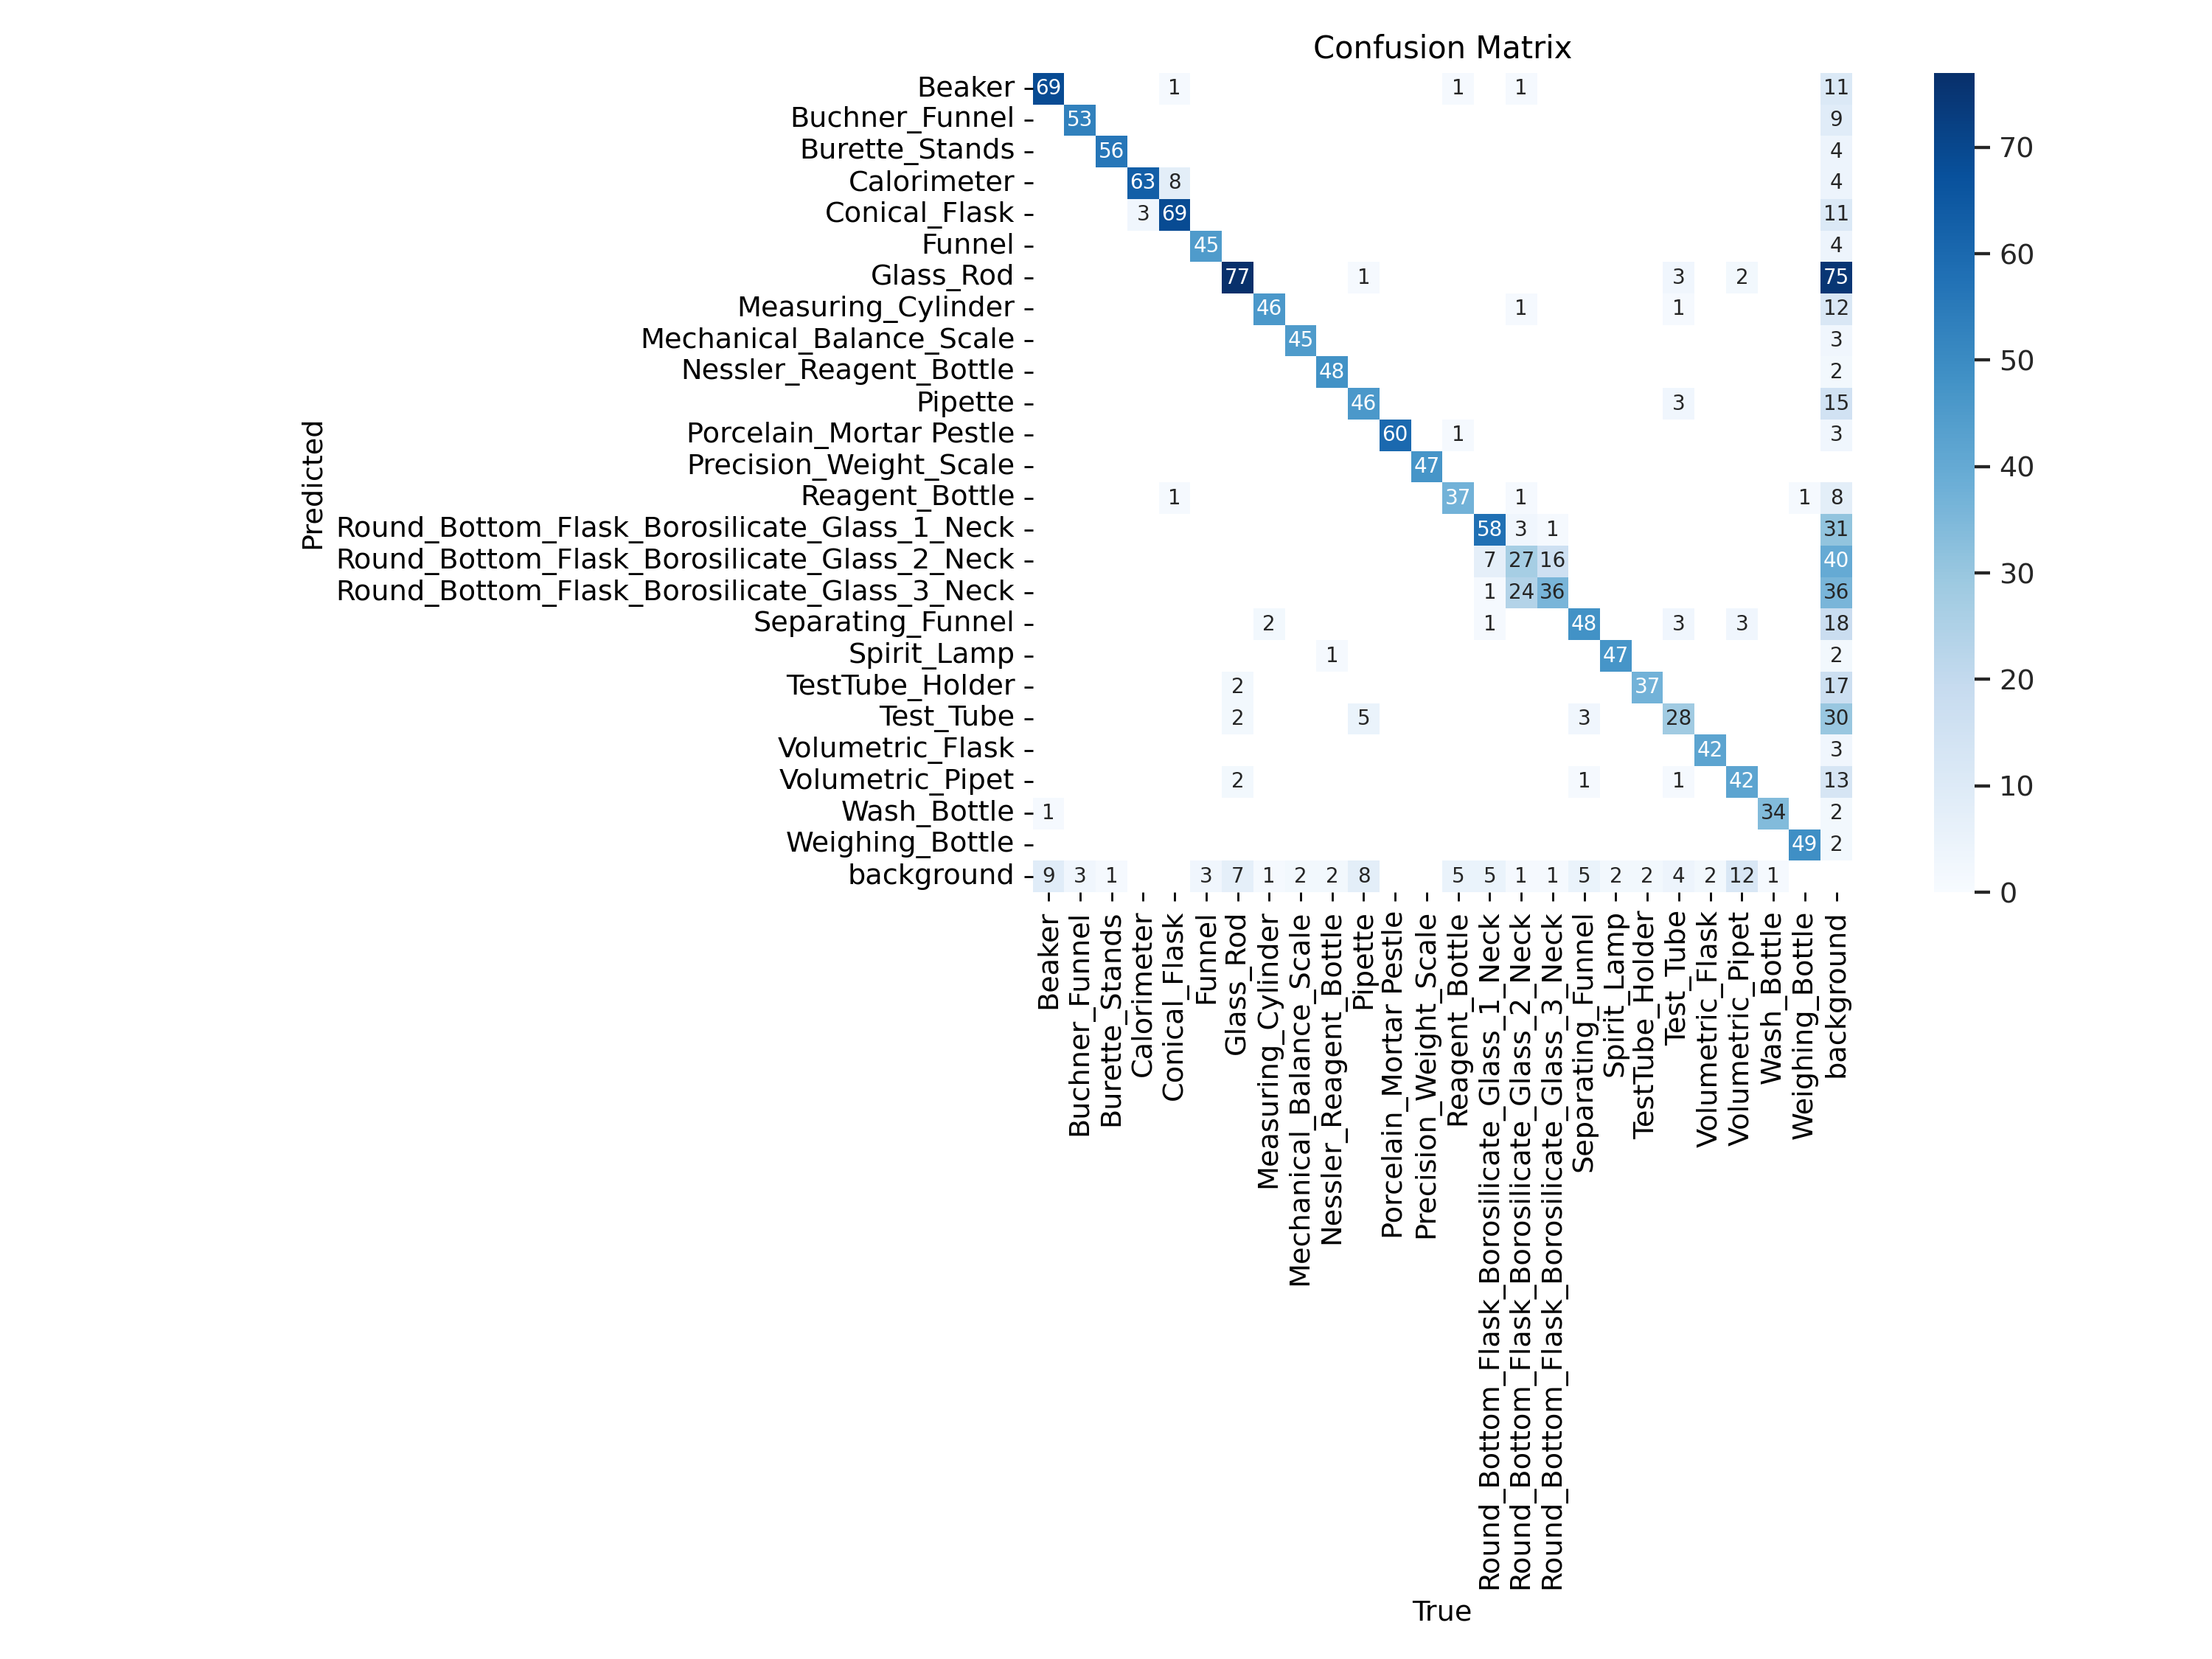

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

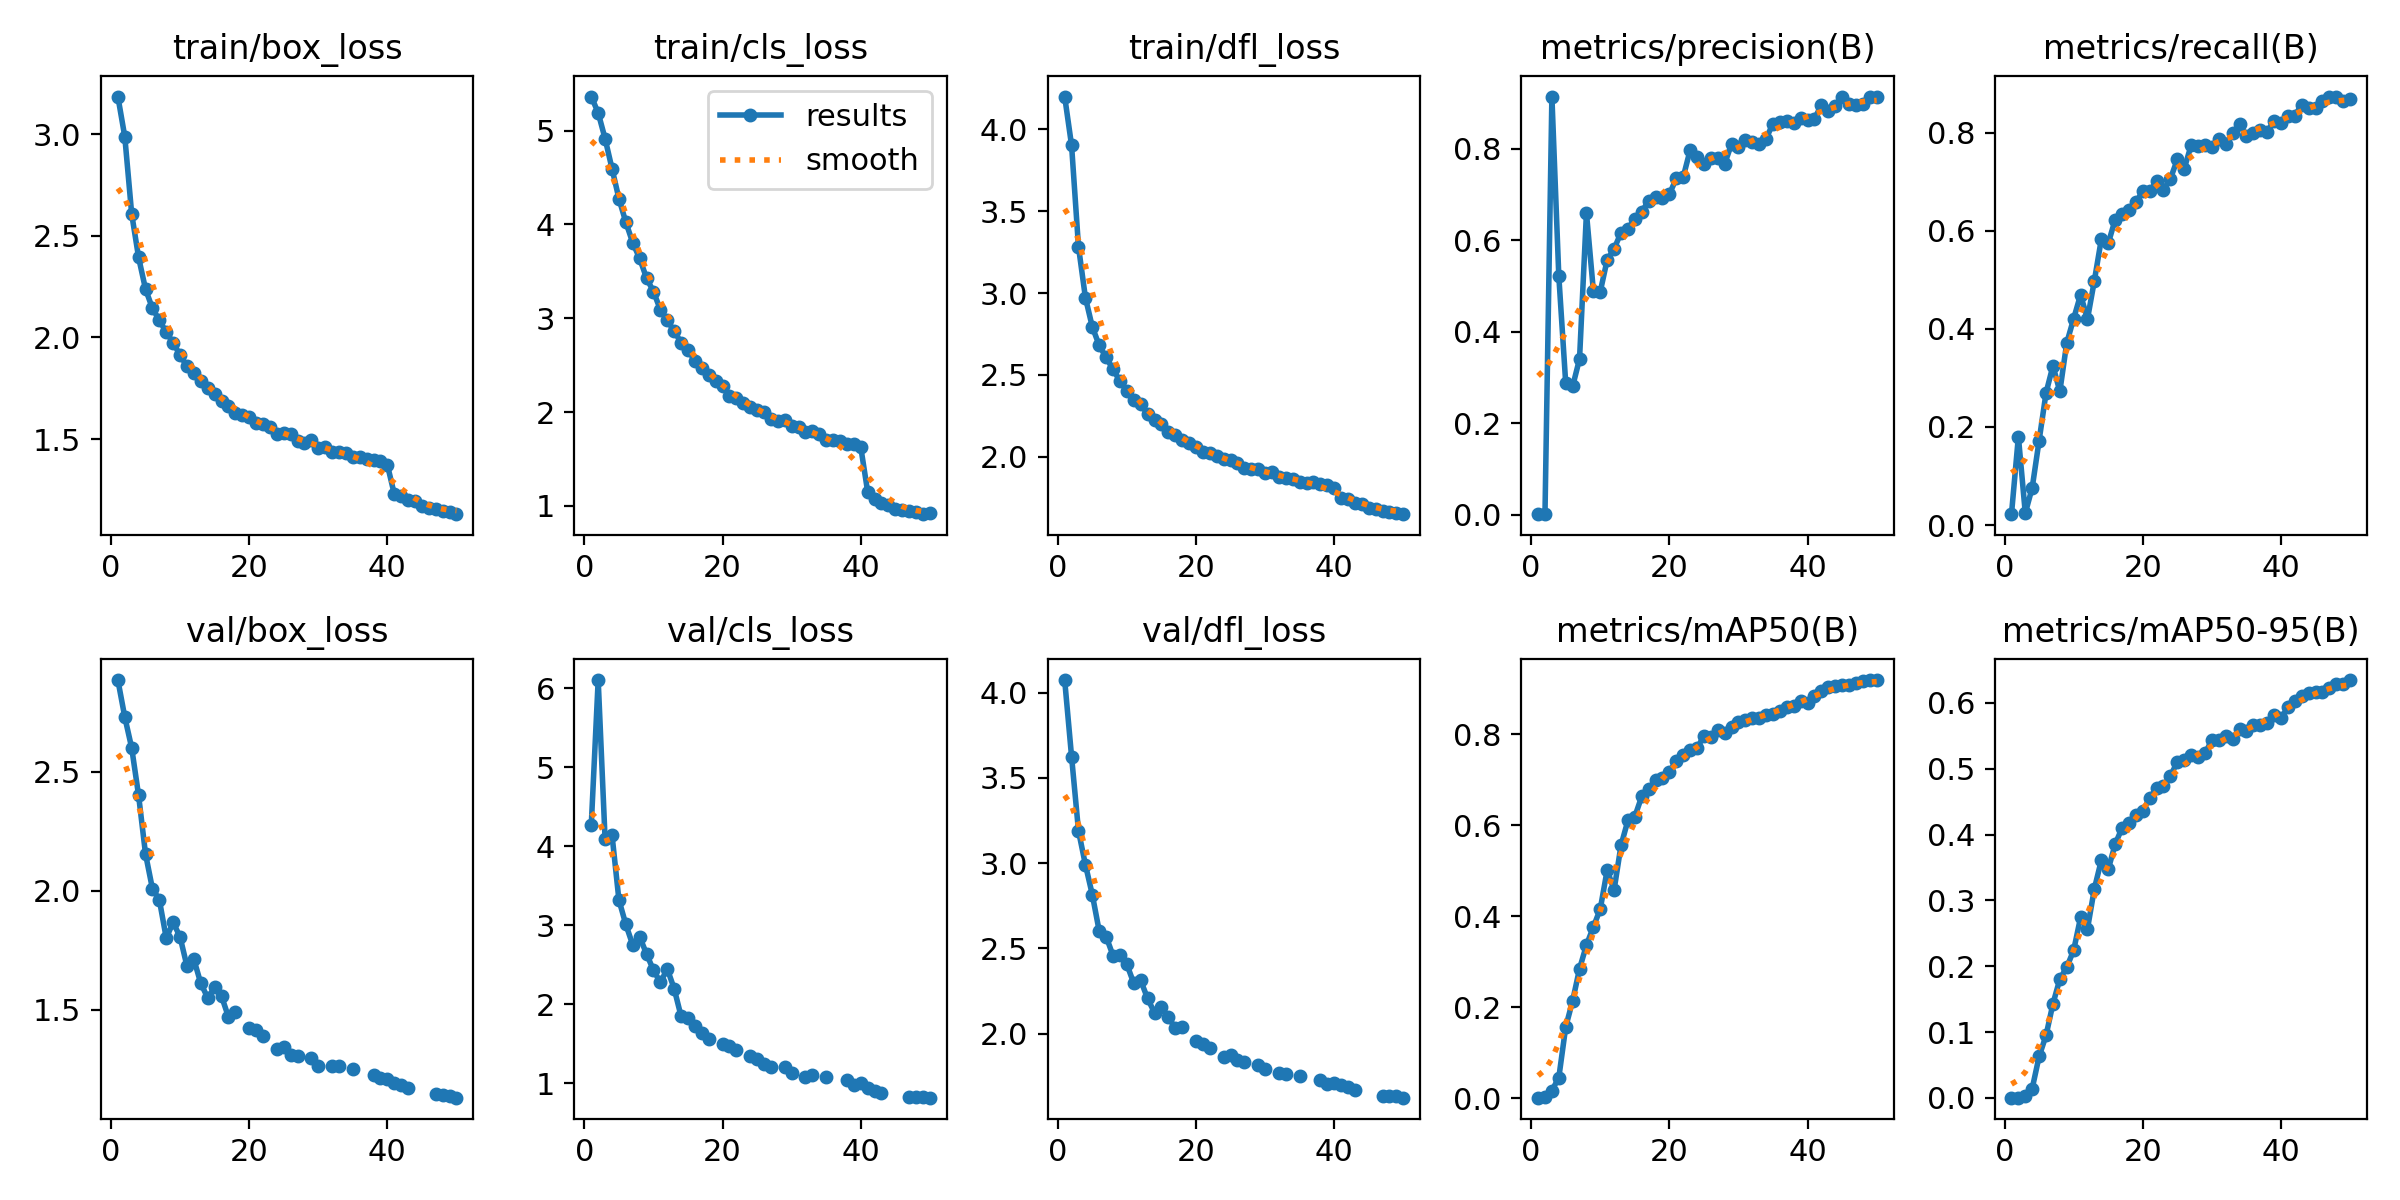

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['Beaker',
 'Buchner_Funnel',
 'Burette_Stands',
 'Calorimeter',
 'Conical_Flask',
 'Funnel',
 'Glass_Rod',
 'Measuring_Cylinder',
 'Mechanical_Balance_Scale',
 'Nessler_Reagent_Bottle',
 'Pipette',
 'Porcelain_Mortar Pestle',
 'Precision_Weight_Scale',
 'Reagent_Bottle',
 'Round_Bottom_Flask_Borosilicate_Glass_1_Neck',
 'Round_Bottom_Flask_Borosilicate_Glass_2_Neck',
 'Round_Bottom_Flask_Borosilicate_Glass_3_Neck',
 'Separating_Funnel',
 'Spirit_Lamp',
 'TestTube_Holder',
 'Test_Tube',
 'Volumetric_Flask',
 'Volumetric_Pipet',
 'Wash_Bottle',
 'Weighing_Bottle']

In [ ]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [ ]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.6079146476392812
mAP 50 0.8882892110474454
mAP 75 0.7604264572257788


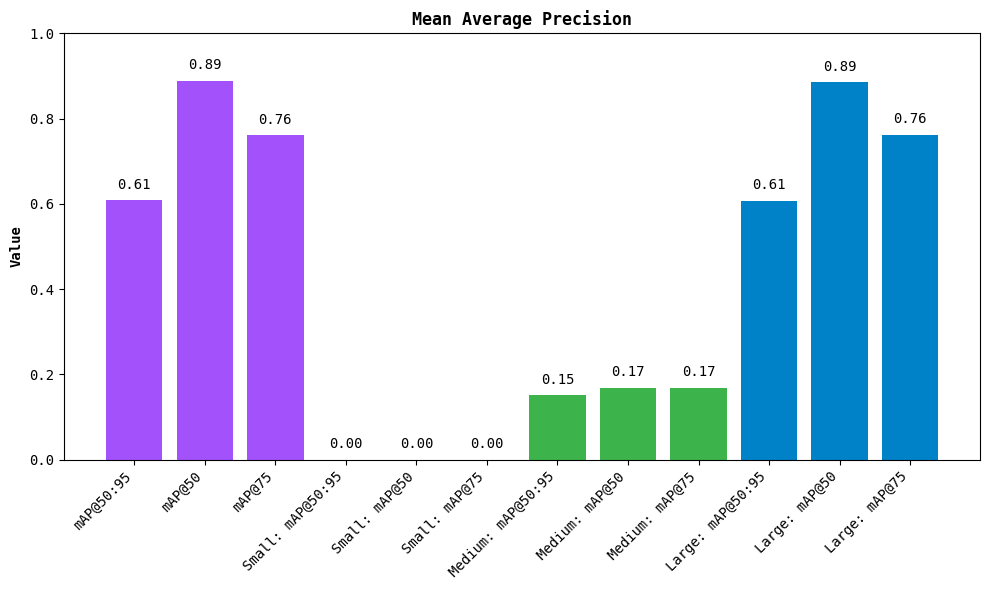

In [ ]:
map.plot()

***Inference Model Performance***

In [ ]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

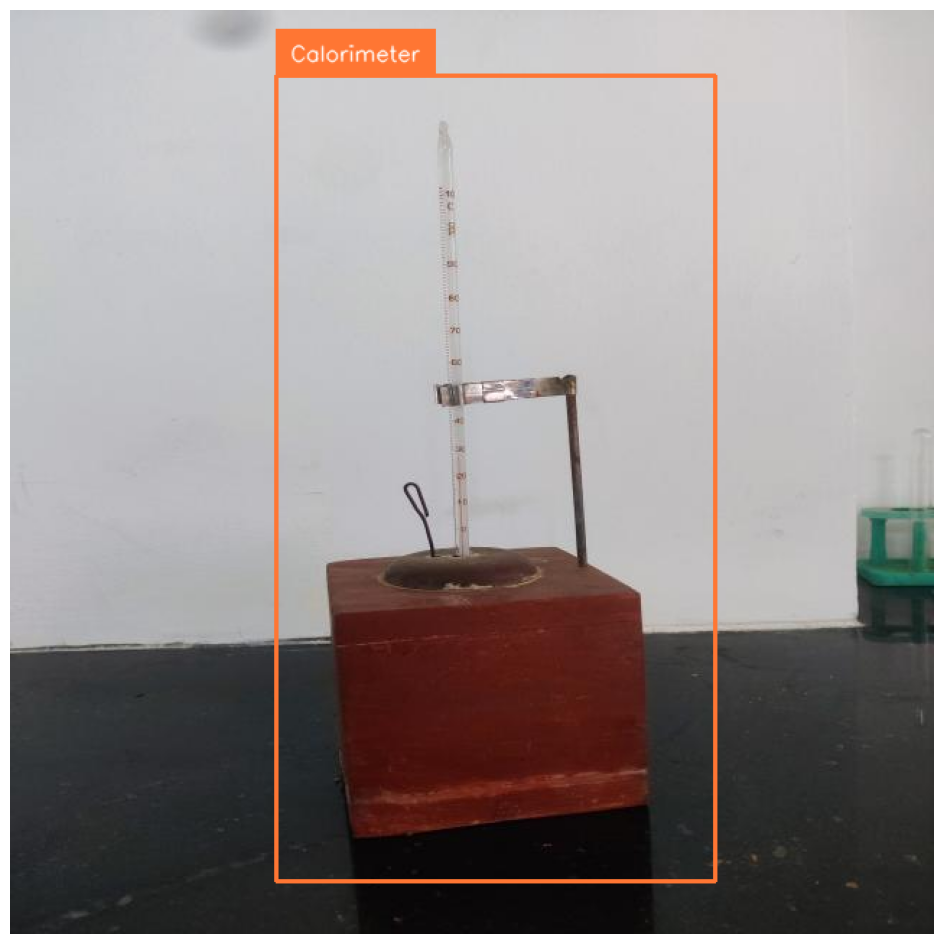

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
!zip -r /content/yolov12_chemeq25.zip /content/runs/
from google.colab import files
files.download('/content/yolov12_chemeq25.zip')

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 13%)
  adding: content/runs/detect/train/results.csv (deflated 60%)
  adding: content/runs/detect/train/F1_curve.png (deflated 9%)
  adding: content/runs/detect/train/args.yaml (deflated 52%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 10%)
  adding: content/runs/detect/train/weights/last.pt (deflated 10%)
  adding: content/runs/detect/train/results.png (deflated 8%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 3%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 4%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 19%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 15%)
  adding: content/runs/detect/train/labels.jpg (deflated 17%)
  adding:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>